<a href="https://colab.research.google.com/github/RafaelMartins008/Projeto_Imersao_Alura/blob/main/Projeto_Analise_de_Dados_com_Gemini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q -u google-generativeai


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: -u


In [20]:
import google.generativeai as genai
import numpy as np
import pandas as pd
GOOGLE_API_KEY='USE_SUA_GOOGLE_API_KEY'
genai.configure(api_key=GOOGLE_API_KEY)

In [21]:
for a in genai.list_models():
   if 'embedContent' in a.supported_generation_methods:
    print(a.name)

models/embedding-001
models/text-embedding-004


In [25]:
dados_vendas = pd.read_excel('exemplo.xlsx')

In [28]:
dados_vendas

,Produto,Ano,Mês,Quantidade Vendida
0,A,2024,jan,10
1,B,2024,jan,15
2,C,2024,jan,80
3,A,2024,fev,20
4,B,2024,fev,32
5,C,2024,fev,90
6,A,2024,mar,18
7,B,2024,mar,20
8,C,2024,mar,56
9,A,2024,abr,9


In [35]:
model = genai.GenerativeModel(model_name="gemini-1.5-pro-latest",
                              system_instruction=instrucao)

In [41]:
instrucao = 'Aja como um analista de dados utilizando o python no Google Colab para fazer uma analise de dados, considerando um modelo de uma tabela com os campos Produto,Ano,Mês e Quantidade Vendida. Esses dados estão em um Dataframe do Pandas chamado dados_vendas '

//Nunca usei com Python, não consegui fazer o Gemini interpretar corretamente o Dataframe ---- Ponte de melhoria para deixar usual, até lá a variável a baixo representa esse interpretação

In [45]:
pre_prompt = "considerando um modelo de uma tabela com os campos Produto,Ano,Mês e Quantidade Vendida. Esses dados estão em um Dataframe do Pandas chamado dados_vendas. Retorne apenas codigo"

In [14]:
chat = model.start_chat(history=[])

//Aqui a ideia é o chatbot consiga já startar o camando em python para execultar a consulta - por hora precisa códiar o código e rodar manualmente.

In [50]:
prompt = pre_prompt+input('Solicitação:')

while prompt != 'fim':
 response = chat.send_message(prompt)
 print(response.text, "\n")
 prompt = input('Solicitação:')

Solicitação:crie um grafico de barra da venda dos produtos por mês
```python
dados_vendas.groupby(['Mês', 'Produto'])['Quantidade Vendida'].sum().unstack().plot(kind='bar')
```
 

Solicitação:fim


// Resposta da Pergunta: crie um grafico de barra da venda dos produtos por mês

<Axes: xlabel='Mês'>

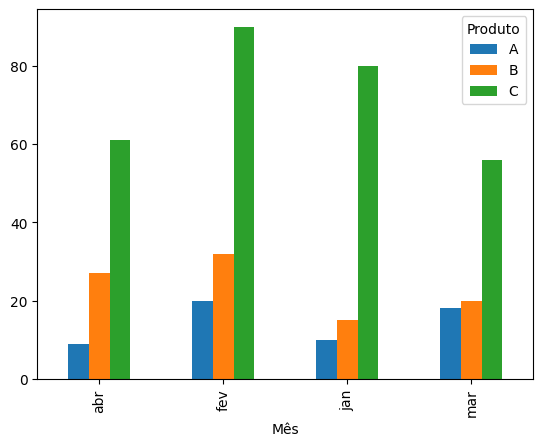

In [51]:
dados_vendas.groupby(['Mês', 'Produto'])['Quantidade Vendida'].sum().unstack().plot(kind='bar')

// Resposta da Pergunta: crie um grafico de evolução de vendas por mês

<Axes: xlabel='Ano,Mês'>

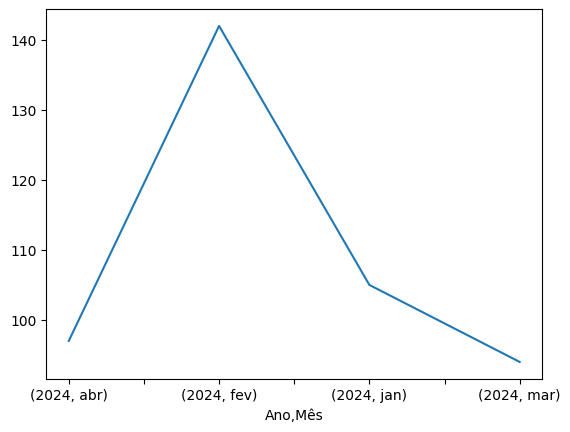

In [49]:
dados_vendas.groupby(['Ano', 'Mês'])['Quantidade Vendida'].sum().plot()

// Resposta da pergunta:calcule a média de vendas do produto A

In [47]:
dados_vendas[dados_vendas['Produto'] == 'A']['Quantidade Vendida'].mean()

14.25